## Graficador da Base de dados sintéticos 

In [1]:
####################PACOTES###########################
%matplotlib inline
import numpy as np
import pylab as py
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import Latex
from pandas.plotting import scatter_matrix
import sys
from string import ascii_uppercase # pacote que plota letras no gráfico
from sklearn.metrics import confusion_matrix

#---------------------
sys.path.insert(0,'../modules')
from appynho import plotagem as plm

#######################################################

# Banco de dados sintético (BD)

In [3]:
DB= pd.read_csv("../inputs/Sintetico/BDsintetico.txt", sep='\s+' , skiprows=2, names=('Rock', 'Code' ,'Depth' ,'RHOB', 'GR','SP','DT'))
df=pd.DataFrame(DB)
#df=df.drop([0])#retira cabeçalho
#df=df.drop('Rock',axis=1)#retira a coluna litologia
df=df.drop('Code',axis=1) #retira a coluna codigo
df=df.drop('Depth',axis=1) #retira a coluna prof
#print(df,type(df))
#scatter_matrix(df, alpha=0.2, figsize= (12,12), diagonal='hist') #uma primeira abordagem
#print(df.Depth,type)


### Convoluíndo o dado:


 Esta é um tipo de convolução própria para espaços discretos. 
 
 $$
 \begin{equation}
 Y[n] = H\{x[n]\} \\
 Y[n] =  \sum^{\infty}_{k=-\infty} x[k]h[n-k]
 \end{equation}
 $$

Onde $H\{x[n]\}$ é a representação de um sistema linear de um impulso discreto no domínio $x[n]$. $Y[n]$ é a reconstrução da função solução do sistema linear que pode ser representada pelo domínio $x[k]$ que representa o impulso original do sinal $h[n-k]$.  

Este estudo analítico foi baseado no método de resolução de sistemas lineares que podem ser consultados nas seguintes referências.


#### Referências:


[Teoria da convolução](https://en.wikipedia.org/wiki/Convolution)

[Documentação da função no pyhton](https://docs.scipy.org/doc/numpy/reference/generated/numpy.convolve.html)
 
[Aula](https://youtu.be/Sf6MIC8CgdU)

In [4]:
#Cria o dicionário de cores do meu modelo baseado em moriak

# segundo método
codigo={'#00d34e':'Shale 2',
       '#82a7dd' :'Dolomite',
       '#ff0004' :'Diabase',
       '#ff6004' :'Conglomerate',
       '#f4a15a' :'Fault Zone (Co-Cr  20%)',
       '#ffddaa' :'Fault Zone (Co-Cr  40%)',
       '#ffd9b7' :'Fault Zone (Co-Cr  60%)',
       '#faead6' :'Fault Zone (Co-Cr  80%)',
       '#ffbca4' :'Crystalline',
       '#7b7b01' :'Shale 1',
       '#173c72' :'Halite',
       '#a70001' :'Granite',
       '#ffe57b' :'Sandstone'}
print(codigo.values(),type(codigo))

dict_values(['Shale 2', 'Dolomite', 'Diabase', 'Conglomerate', 'Fault Zone (Co-Cr  20%)', 'Fault Zone (Co-Cr  40%)', 'Fault Zone (Co-Cr  60%)', 'Fault Zone (Co-Cr  80%)', 'Crystalline', 'Shale 1', 'Halite', 'Granite', 'Sandstone']) <class 'dict'>


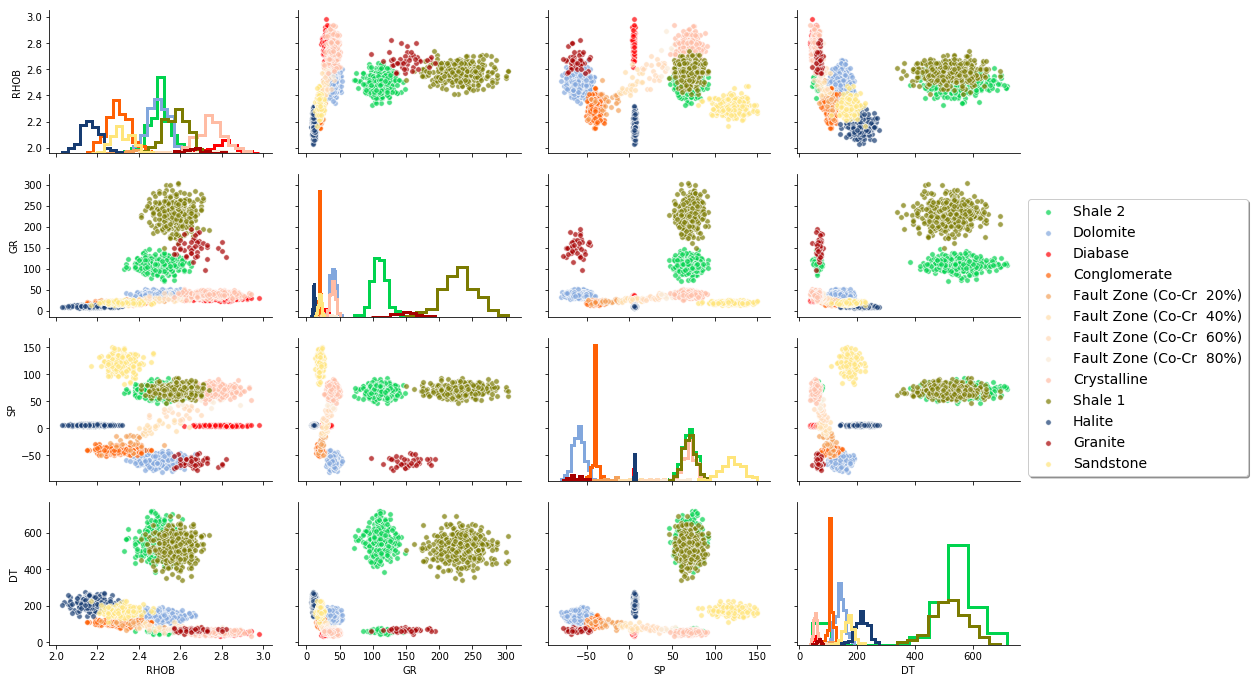

In [12]:
g = sns.PairGrid(df,hue='Rock',hue_order=None, palette=codigo.keys(), height=2.4, aspect=1.5 )

g.map_diag(plt.hist, histtype="step", linewidth=3) 
g.map_offdiag(sns.scatterplot, linewidths=1, edgecolor="w", s=30, alpha=0.7 )
g.fig.legend(labels=codigo.values(), fontsize=14, loc='center right', bbox_to_anchor=(1.21, 0.5),
             fancybox=True, shadow=True, ncol=(1))

g.savefig('../TeX/imagens/BDsintetico.png', dpi = 100, bbox_inches = 'tight', transparent = True)

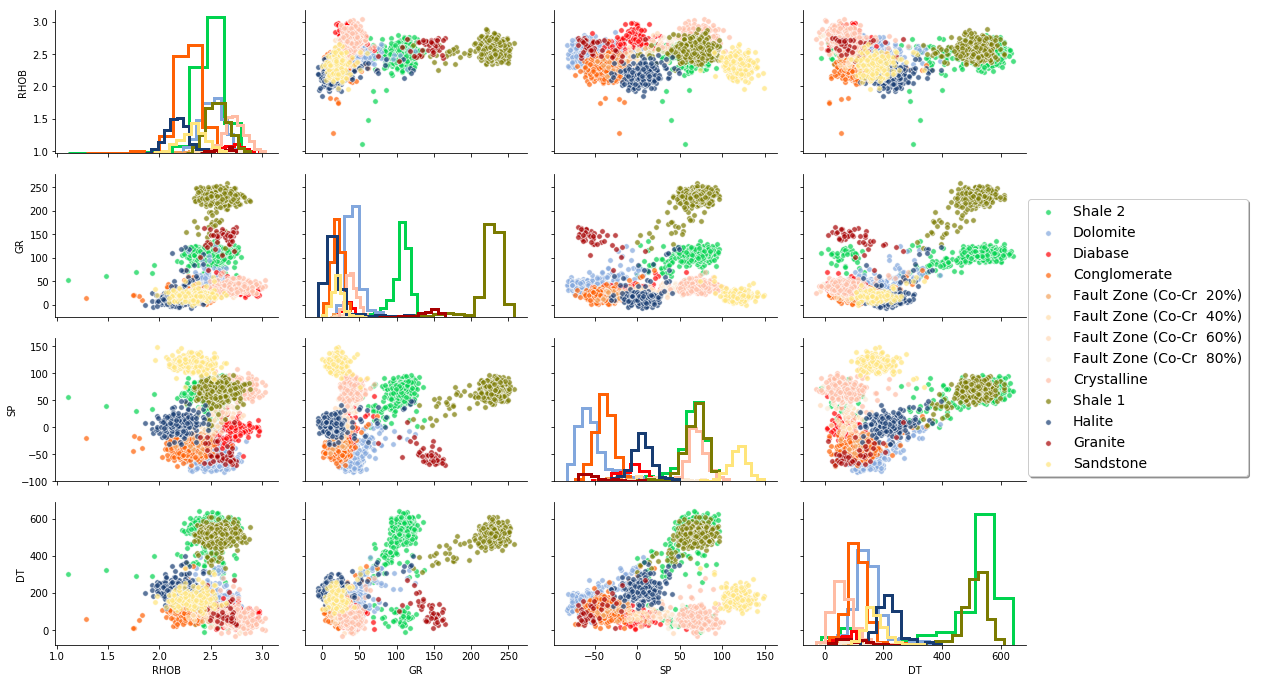

In [13]:
#Dado convolvido 

DBC= pd.read_csv("../inputs/Sintetico/BD_convolvido.txt", sep='\s+',skiprows=1, names=('Rock','Code','Depth','RHOB','GR','SP','DT'))
dfc=pd.DataFrame(DBC)
dfc=dfc.drop('Depth',axis=1) #retira a coluna prof
dfc=dfc.drop('Code',axis=1) #retira a coluna prof

gc = sns.PairGrid(dfc,hue='Rock',hue_order=None, palette=codigo.keys(), height=2.4, aspect=1.5 )

gc.map_diag(plt.hist, histtype="step", linewidth=3) 
gc.map_offdiag(sns.scatterplot, linewidths=1, edgecolor="w", s=30, alpha=0.7 )
gc.fig.legend(labels=codigo.values(), fontsize=14, loc='center right', bbox_to_anchor=(1.21, 0.5),
             fancybox=True, shadow=True, ncol=(1))

gc.savefig('../TeX/imagens/BDsintetico_convolvido.png', dpi = 100, bbox_inches = 'tight', transparent = True)

## FIM